# Dog breed classification challenge

## I have used three types of network definitions:

### 1. Pre-trained models:
###    Resnet50
###    InceptionNet
###    Xception
###    Vgg16
### 2. Transfer learning and Fine Tuning on Xception Net
### 3. Make your own ConvNet model from scratch

## Transfer learning helps when we want to make weights initialization from an already trained network.
## Fine Tuning helps to train specific layers of the networks.
## We should leverage these two concepts when we have a very large dataset and when we can find some network weights which have been previously trained on a similar dataset

## Setup the Data

In [9]:
from classifier.load_data import *
from classifier.models import Models
from classifier.train import *

print('TRAINING DATA PREP')
filename_list, labels_list, annotation_list = load_matfile('data/lists/train_list.mat')
data_frame = create_dataframe(filename_list[:200], labels_list[:200], annotation_list[:200], 'data/annotation/')
pickle_file(data_frame=data_frame, file_to_save='train_data.pickle')

x_train = to_numpy_array(data_frame[:200], image_shape=(224, 224), data_path='data/images/')
y_train = labels_to_logical(labels_list[:200])

print('TEST DATA PREP')
filename_list, labels_list, annotation_list = load_matfile('data/lists/test_list.mat')
data_frame = create_dataframe(filename_list[:200], labels_list[:200], annotation_list[:200], 'data/annotation/')
pickle_file(data_frame=data_frame, file_to_save='test_data.pickle')

x_test = to_numpy_array(data_frame[:200], image_shape=(224, 224), data_path='data/images/')
y_test = labels_to_logical(labels_list[:200])

#Load the dictionary mappings for the labels
with open(r"data/labels_dict.pickle", "rb") as input_file:
    dictionary_labels_classes = pickle.load(input_file)
    
print('See how the dataframe looks like')
print(data_frame[:3])

TRAINING DATA PREP
Loading the mat files
0
100
Cropping, resizing and saving as a numpy array
0
100
Conversion to one-hot encoding
TEST DATA PREP
Loading the mat files
0
100
Cropping, resizing and saving as a numpy array
0
100
Conversion to one-hot encoding
See how the dataframe looks like
     folder  label          image_name      annotation width height depth  \
0  02085620      1  n02085620_2650.jpg  n02085620_2650   500    333     3   
1  02085620      1  n02085620_4919.jpg  n02085620_4919   240    206     3   
2  02085620      1  n02085620_1765.jpg  n02085620_1765   391    500     3   

        name xmin ymin xmax ymax  
0  Chihuahua  108   87  405  303  
1  Chihuahua   10   22  180  205  
2  Chihuahua   55   85  327  437  


## Train and Test XceptionNet for Transfer Learning and Fine Tuning

In [2]:
print('COMPILE and TRAIN MODEL')
model = Models()
model = model.TransferFine(top_layers=True)
history, model = train(model, x_train, y_train, split=0.8, early_stopping=True, epochs=5)

print('Saving: Model Architecture and Weights')
model.save('save_architecture.h5')
model.save_weights('save_model_weights.h5')


COMPILE and TRAIN MODEL
Training Model......
Epoch 1/5
5/5 [==============================] - 81s 16s/step - loss: 1.9425 - acc: 0.6500 - val_loss: 6.6207e-04 - val_acc: 1.0000
Epoch 2/5
5/5 [==============================] - 89s 18s/step - loss: 0.0828 - acc: 0.9813 - val_loss: 7.0686e-05 - val_acc: 1.0000
Epoch 3/5
5/5 [==============================] - 91s 18s/step - loss: 0.1397 - acc: 0.9875 - val_loss: 5.8146e-05 - val_acc: 1.0000
Epoch 4/5
5/5 [==============================] - 91s 18s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 3.3532e-05 - val_acc: 1.0000
Epoch 5/5
5/5 [==============================] - 101s 20s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.6762e-05 - val_acc: 1.0000
Saving: Model Architecture and Weights


## Predict on some test images

In [3]:
print('PREDICTING CLASSES')
   
classes = []
class_dogs = []
test = x_test[:10]
for i in range(len(test)):
    pred = np.argmax(model.predict(np.expand_dims(resize(test[i], (299, 299)), axis=0)))+1
    classes.append(pred)
    class_dogs.append(dictionary_labels_classes[pred])

print('Predicted Labels')
print(classes)
print(class_dogs)

print('True Labels')
print(labels_list[:10])

PREDICTING CLASSES
Predicted Labels
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua', u'Chihuahua']
True Labels
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Let us see some curves and a test image

Let us see some training and validation curves
['acc', 'loss', 'val_acc', 'val_loss']


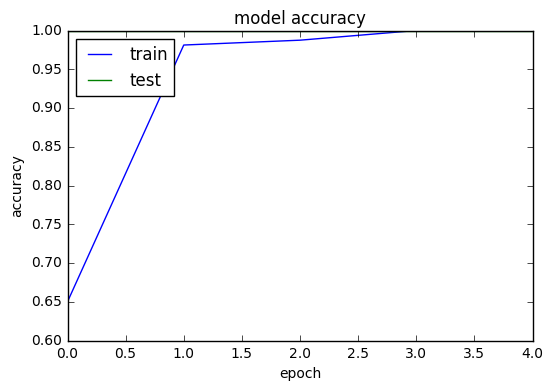

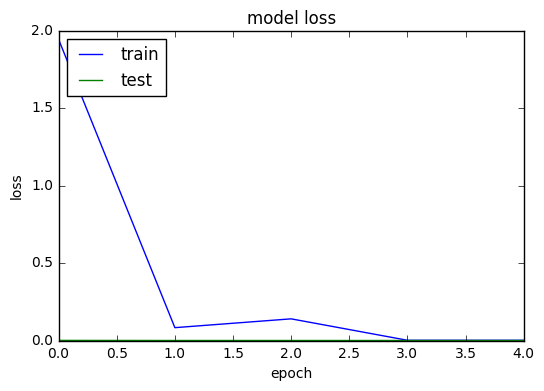

/Users/pulkit/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


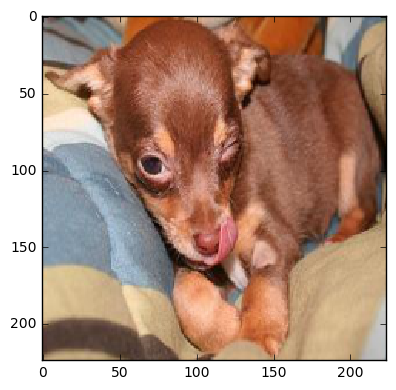

('So, it was actually a', u'Chihuahua')


In [4]:
print('Let us see some training and validation curves')

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot a test image
io.imshow(x_test[0])
plt.show()
print('So, it was actually a', dictionary_labels_classes[labels_list[0]])

## Test an image on ResNet50 pre-trained network

In [5]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

print('Load and Test Model')
model = Models.PreTrained()
model = model.resnet50()

test_image = np.expand_dims(resize(x_test[20], (224, 224)), axis=0)
preds_resnet = model.predict(test_image)
_, imagenet_class_name, prob = decode_predictions(preds_resnet, top=1)[0][0]

print('Predicted Label')
print(imagenet_class_name, prob)

print('True Label')
print(labels_list[20], dictionary_labels_classes[labels_list[20]])


Load and Test Model
Predicted Label
(u'nematode', 0.15411375)
True Label
(1, u'Chihuahua')


## Test an image on Inception_V3 pre-trained network

In [7]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

print('Load and Test Model')
model = Models.PreTrained()
model = model.Inception_V3()

test_image = np.expand_dims(resize(x_test[20], (299, 299)), axis=0)
preds_inception = model.predict(test_image, batch_size=32)
_, imagenet_class_name, prob = decode_predictions(preds_inception, top=1)[0][0]

print('Predicted Label')
print(imagenet_class_name, prob)

print('True Label')
print(labels_list[20], dictionary_labels_classes[labels_list[20]])

Load and Test Model
Predicted Label
(u'Chihuahua', 0.91658884)
True Label
(1, u'Chihuahua')


### Thanks and let me know if you have any questions!